In [11]:
%pip install matplotlib
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [12]:
df = pd.read_csv('bank_transactions_data_2.csv')
df_info = df.info()
df_head = df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [13]:
df_head, df_info

(  TransactionID AccountID  TransactionAmount      TransactionDate  \
 0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
 1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
 2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
 3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
 4      TX000005   AC00411              13.45  2023-10-16 17:51:24   
 
   TransactionType   Location DeviceID      IP Address MerchantID Channel  \
 0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
 1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
 2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
 3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
 4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   
 
    CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
 0           70             Doctor      

In [14]:
df.isnull()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2508,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2509,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2510,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
# Make a copy of the original dataset.
df_processed = df.copy()

# Step1 : Convert date columns to datetime
df_processed['TransactionDate'] = pd.to_datetime(df_processed['TransactionDate'])
df_processed['PreviousTransactionDate'] = pd.to_datetime(df_processed['PreviousTransactionDate'])

# Step2: Create time differneces between transactions
df_processed['TimeSinceLastTransaction'] = (df_processed['TransactionDate'] - df_processed['PreviousTransactionDate']).dt.total_seconds()

# Step3 : Extract date features
df_processed['TransactionHour'] = df_processed['TransactionDate'].dt.hour
df_processed['TransactionDaysOfWeek'] = df_processed['TransactionDate'].dt.dayofweek

# Step4: Create transaction amount to amount balance ratio
df_processed['TransactionToBalanceRatio'] = df_processed['TransactionAmount'] / (df_processed['AccountBalance'] +1e-5)

categorical_cols = ['TransactionType', 'Location', 'DeviceID', 'MerchantID', 
                    'Channel', 'CustomerOccupation', 'AccountID']

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le


df_processed.drop(columns=['TransactionID', 'IP Address', 'TransactionDate', 'PreviousTransactionDate'], inplace = True)

scaler = StandardScaler()
numerical_cols = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'LoginAttempts',
                'TimeSinceLastTransaction', 'TransactionHour', 'TransactionDaysOfWeek',
                'TransactionToBalanceRatio', 'CustomerAge']

df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])
df_processed.head()


,AccountID,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TimeSinceLastTransaction,TransactionHour,TransactionDaysOfWeek,TransactionToBalanceRatio
0,126,-0.971275,1,36,365,14,0,1.423718,0,-0.552443,-0.206794,-0.000537,-0.800762,-0.856729,-0.296655,-0.385446
1,450,0.269440,1,15,50,51,0,1.311287,0,0.305314,-0.206794,2.216472,-0.076706,-0.856729,-0.296655,-0.337398
2,18,-0.586882,1,23,229,8,2,-1.443277,3,-0.909842,-0.206794,-1.023534,0.046138,1.879574,-0.958464,-0.170959
3,68,-0.387456,1,33,182,1,2,-1.049768,3,-1.353017,-0.206794,0.885797,-0.575097,-0.856729,1.688773,-0.348760
4,406,-0.973468,0,1,298,90,2,-1.049768,3,1.120184,-0.206794,0.593589,0.967391,0.511423,-0.958464,-0.387294


/Users/ssk/opt/anaconda3/envs/keras/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ssk/opt/anaconda3/envs/keras/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ssk/opt/anaconda3/envs/keras/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

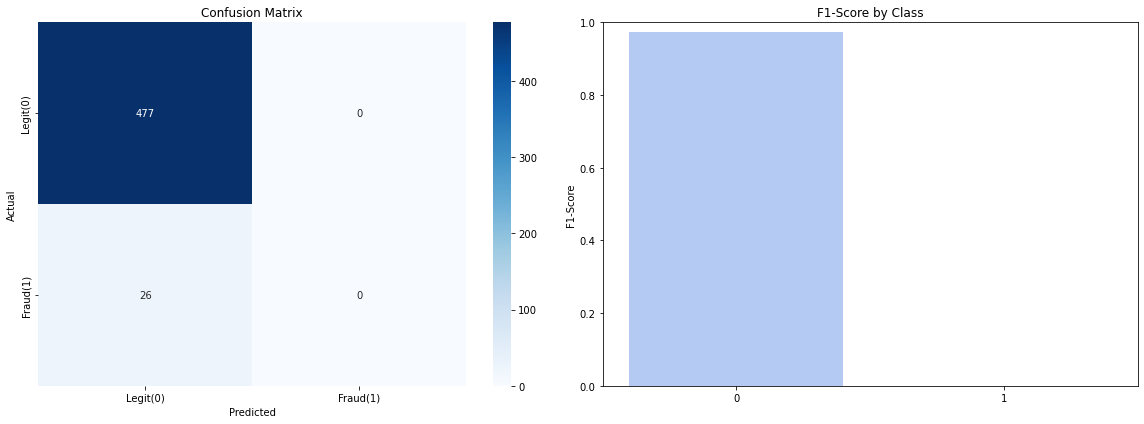

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Simulate a binary target varible "is_fraud" for demonstration
# Assume that 5% of the transactions are fradulent
np.random.seed(42)
df_processed['is_fraud'] = np.random.choice([0,1],size = len(df_processed), p = [0.95, 0.05])

# Split the data into freatures and targets
X = df_processed.drop(columns=['is_fraud'])
y = df_processed['is_fraud']

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 42)

# Train RandomForestClassifier with class weight
# rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# rf.fit(X_train, y_train)
rf_weighted = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced', random_state = 42)
rf_weighted.fit(X_train, y_train)


# Predict on test set
y_pred_weighted = rf_weighted.predict(X_test)

# Evaluation using confusion matrix and classificaiton report
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
class_report_weighted = classification_report(y_test,y_pred_weighted, output_dict = True)
report_df = pd.DataFrame(class_report_weighted).transpose()

fig,axes = plt.subplots(1,2, figsize= (16,6))

sns.heatmap(conf_matrix_weighted, annot = True, fmt = 'd', cmap = 'Blues',ax = axes[0])
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_xticklabels(['Legit(0)','Fraud(1)'])
axes[0].set_yticklabels(['Legit(0)','Fraud(1)'])


f1_scores = report_df.loc[['0','1'], 'f1-score']
sns.barplot(x = f1_scores.index,y = f1_scores.values,palette = 'coolwarm',ax = axes[1])
axes[1].set_title('F1-Score by Class')
axes[1].set_ylabel('F1-Score')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()